In [38]:
import re
from textblob import TextBlob
import numpy as np
from textblob import Word
from textblob.classifiers import NaiveBayesClassifier
import nltk
from nltk.probability import FreqDist
import random
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd

## Reading the  processed and projected data obtaned in the previous notebook

In [39]:
with open("processed_file.txt", "r") as fh:
    data = fh.read().strip()
    data = re.sub(r"[^\w\s)]", "", data)
fh.close()

In [40]:
lines = data.split("\n")
paired = [item.split("\t") for item in lines] # to get the review  with its label
paired[11]

['believe it or not this used to be q really good mcdonalds the drive throuh is so slow it is frustrating but the service is always friendly food is normally luke warm my niece likes the toys from mcdonalds i wonder if i pull up to the window and say let me just get the toy woulf service be faster',
 'SlowService']

## Extracting Tokens in Reviews

In [41]:
all_reviews = "".join([item[0] for item in paired]) ## all reviews
tokens = nltk.word_tokenize(all_reviews)
freq = nltk.FreqDist(tokens)
tages = nltk.pos_tag(tokens)

### The primary methods for feature selection is making bag of words. 
For each category of interesting words, we found the top frequent
ones and put them in our bag.

### Most frequent unigrams

Text(0.5, 1.0, 'Most frequent unigrams')

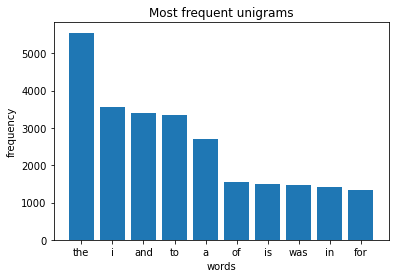

In [43]:
wordss = []
valuess = []
for k in freq.most_common(10):
    wordss.append(k[0])
    valuess.append(k[1])
plt.bar(wordss, valuess)
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('Most frequent unigrams')


### Most frequent bigrams

In [44]:
bigrams = nltk.bigrams(all_reviews.split(" "))
bigram_freq = nltk.FreqDist(list(bigrams))
sorted_bigram_freq = bigram_freq.most_common()
lst1 = []
lst2 = []
for k in sorted_bigram_freq[20:80]:
    lst1.append(k[0])
    lst2.append(k[1])
    
df = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['bigram', 'frequency'])
df.head()

,bigram,frequency
0,"(the, food)",156
1,"(out, of)",143
2,"(so, i)",142
3,"(to, this)",141
4,"(this, place)",138


### Most frequent trigrams

In [46]:
trigrams = nltk.trigrams(all_reviews.split(" "))
trigram_freq = nltk.FreqDist(list(trigrams))
sorted_trigram_freq = trigram_freq.most_common()

lst1 = []
lst2 = []
for k in sorted_trigram_freq[10:20]:
    lst1.append(k[0])
    lst2.append(k[1])
    
df = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['trigram', 'frequency'])
df.head()

,trigram,frequency
0,"(the, food, is)",40
1,"(i, have, ever)",40
2,"(the, worst, mcdonalds)",38
3,"(go, to, this)",36
4,"(i, asked, for)",35


# Apply POS tagging for Lemmatizing
This means labeling words in a sentence as nouns, adjectives, verbs...etc

## Verb Lemmatizing

We lemmatize all verbs. So am/is/are/was/were become __be__ and so on. 

In [48]:
wnl = nltk.WordNetLemmatizer()

def verb_checker(pair):
    if pair[1].startswith("V"):
        
        return Word(pair[0]).lemmatize("v")
        #return wnl.lemmatize(pair[0])
    else:
        return pair[0]

# Create new lemmitazed tokens (lemmitazed tokens will be assigned to new_tokens)

In [49]:
new_tokens = [verb_checker(item) for item in tages] 
new_tokens[:5]


['im', 'not', 'a', 'huge', 'mcds']

In [50]:
new_tokens_tages = nltk.pos_tag(new_tokens)
new_tokens_tages[:5]

[('im', 'NN'), ('not', 'RB'), ('a', 'DT'), ('huge', 'JJ'), ('mcds', 'NN')]

In [22]:
#nltk.pos_tag(["token", "taken"])

### Generating a Dictionary of POS tags VB, NN, JJ, RB

Text(0.5, 1.0, 'bar chart of pos tags')

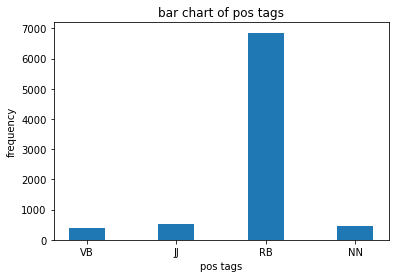

In [51]:
dic_of_pos = {"VB":[], "JJ":[], "RB":[], "NN":[]}
for token in set(new_tokens):
    pair = nltk.pos_tag([token])[0]
    if pair[1].startswith("VB"):
        dic_of_pos["VB"].append(pair[0])
    if pair[1].startswith("JJ"):
        dic_of_pos["JJ"].append(pair[0])
    if pair[1].startswith("NN"):
        dic_of_pos["NN"].append(pair[0]) #adverb
    if pair[1].startswith("RB"):
        dic_of_pos["RB"].append(pair[0])
types = list(dic_of_pos.keys())
nb = [len(dic_of_pos["VB"]), len(dic_of_pos["JJ"]), len(dic_of_pos["NN"]), len(dic_of_pos["RB"])]

plt.bar(types,nb, 
        width = 0.4)
plt.xlabel('pos tags')
plt.ylabel('frequency')
plt.title('bar chart of pos tags')

### Frequencies of new tokens

Text(0.5, 1.0, 'Frequency of new tokens')

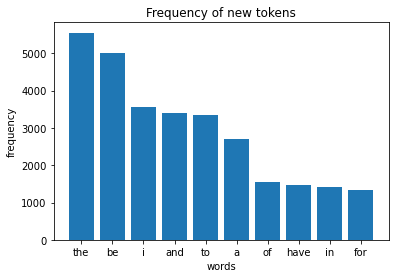

In [24]:
new_tokens_freq = nltk.FreqDist(new_tokens)
wordss = []
valuess = []
for k in new_tokens_freq.most_common(10):
    wordss.append(k[0])
    valuess.append(k[1])
plt.bar(wordss, valuess)
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('Frequency of new tokens')



## After lemmatizing words
 we filter over the noun, verbs, adjective, and adverbs to find the top frequent ones

### We use the dictionary to extract most frequent verbs, adjecyives, adverbs and nouns

In [36]:
verbs = dic_of_pos["VB"]
verb_freq = [(item, new_tokens_freq[item]) for item in verbs]
sorted_verb_freq = sorted(verb_freq, key = lambda x: x[1], reverse = True)

lst1 = []
lst2 = []
for k in sorted_verb_freq[:10]:
    lst1.append(k[0])
    lst2.append(k[1])
    
df = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['verbs', 'frequency'])
df.head()

,verbs,frequency
0,be,4998
1,have,1465
2,get,973
3,go,820
4,do,517


In [34]:
adj = dic_of_pos["JJ"]
adj_freq = [(item, freq[item]) for item in adj ]
sorted_adj_freq= sorted(adj_freq, key = lambda x:x[1], reverse = True)

lst1 = []
lst2 = []
for k in sorted_adj_freq[:30]:
    lst1.append(k[0])
    lst2.append(k[1])
    
df = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['adjectives', 'frequency'])
df.head()

,adjectives,frequency
0,ive,198
1,other,190
2,good,169
3,wrong,162
4,worst,155


In [32]:
nouns = dic_of_pos["NN"]
noun_freq = [(item, freq[item]) for item in nouns]
sorted_noun_freq = sorted(noun_freq, key = lambda x: x[1], reverse = True)

lst1 = []
lst2 = []
for k in sorted_noun_freq[:30]:
    lst1.append(k[0])
    lst2.append(k[1])
    
df = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['noun', 'frequency'])
df.head()

,noun,frequency
0,i,3560
1,mcdonalds,953
2,order,731
3,food,657
4,time,448


In [37]:
adverbs = dic_of_pos["RB"]
adverb_freq = [(item, freq[item]) for item in adverbs]
sorted_adverb_freq = sorted(adverb_freq, key = lambda x: x[1], reverse = True)

lst1 = []
lst2 = []
for k in sorted_adverb_freq[:10]:
    lst1.append(k[0])
    lst2.append(k[1])
    
df = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['adverbs', 'frequency'])
df.head()

,adverbs,frequency
0,not,861
1,so,638
2,there,578
3,up,481
4,just,480


# By selecting a specific number of each, 
we build a binary dataset representing the existence
of each of these words

## Exctracting Boolean Features

we use top frequents bigrams, trigrams, nouns, verbs, adjectives and adverbs as our featrures. How many of each we use is given in the following list:

* Nouns: 100
* Verbs: 100
* Adjectives: 130
* Adevrbs: 110
* Bigrams: 100
* Trigrams: 150

In [88]:
def feature_giver(vec_of_which): ## the argument asks for the portion of each list: given above
    ls = [sorted_noun_freq, sorted_verb_freq, sorted_adj_freq, sorted_adverb_freq, sorted_bigram_freq, sorted_trigram_freq]
    features = []
    for i in range(len(vec_of_which)):
        our_desired_ls = ls[i]
        features = features + our_desired_ls[:vec_of_which[i]]
    return list(set(features))

important_features = feature_giver([100,100,130,110, 100, 150]) 
import_words = [item[0] for item in important_features]
import_words[:10]

[('to', 'this', 'location'),
 ('i', 'asked'),
 'night',
 'big',
 ('i', 'went'),
 ('i', 'would', 'have'),
 ('the', 'only', 'thing'),
 'corporate',
 ('the', 'staff'),
 ('by', 'far', 'the')]

In [89]:
## The following fucntion takes a vector of strings and returns a signle string by concataning them
def vec_to_str(inp):
    if isinstance(inp,tuple):
        res = ""
        for x in inp:
            for char in str(x):
                res+=char
            res+=" "
    else:
        res = inp
    return res.strip()

vec_to_str(('the', 'drive', 'through'))

'the drive through'

### For the features above, we generate a binary vector for each review

In [97]:
def feature_extractor(review):
    features = {}
    for item in import_words:
        item = vec_to_str(item)
        features["has(%s)" % item] = int(item in review)
    return features

data = [] # the binary data and the label for each review
for review in paired:
    data = data + [(feature_extractor(review[0]), review[1])]
data[0]

({'has(to this location)': 0,
  'has(i asked)': 0,
  'has(night)': 0,
  'has(big)': 0,
  'has(i went)': 0,
  'has(i would have)': 0,
  'has(the only thing)': 0,
  'has(corporate)': 0,
  'has(the staff)': 1,
  'has(by far the)': 1,
  'has(cant)': 0,
  'has(the fact that)': 0,
  'has(begging)': 0,
  'has(there was a)': 0,
  'has(great)': 0,
  'has(at least)': 0,
  'has(overpriced)': 0,
  'has(i do not)': 0,
  'has(i go)': 0,
  'has(menu)': 0,
  'has(i have ever)': 0,
  'has(employee)': 0,
  'has(believe)': 0,
  'has(ask)': 0,
  'has(home)': 0,
  'has(literally)': 0,
  'has(unsweetened)': 0,
  'has(my order was)': 0,
  'has(and there are)': 0,
  'has(improve)': 0,
  'has(i would)': 0,
  'has(thinking)': 0,
  'has(the employees are)': 0,
  'has(i)': 1,
  'has(quite)': 0,
  'has(possibly)': 0,
  'has(happy)': 0,
  'has(iced)': 0,
  'has(especially)': 0,
  'has(high)': 0,
  'has(ive ever been)': 1,
  'has(a couple of)': 0,
  'has(asian)': 0,
  'has(thru)': 0,
  'has(quick)': 0,
  'has(time)'

## Writing the data into a csv file

In [91]:
binary_data = [list(item[0].values()) for item in data]

def one_hot(string, labels): ## converting each labels to a 0-1 vector for later Deep Learning Classification
    n = len(labels)
    vec = [0 for i in range(n)]
    for i in range(n):
        if labels[i] == string:
            vec[i] = 1
    return vec
labels = list(set([item[1] for item in data]) )

### Labels for the reviews

In [98]:
labels

['Filthy', 'RudeService', 'BadFood', 'SlowService', 'OrderProblem']

In [99]:
"""target_data = [one_hot(item[1], labels) for item in data] ## Data for Deep learning

np.savetxt("csv_data.csv", binary_data, delimiter = ",")
np.savetxt("target_data.csv", target_data, delimiter = ",")"""

'target_data = [one_hot(item[1], labels) for item in data] ## Data for Deep learning\n\nnp.savetxt("csv_data.csv", binary_data, delimiter = ",")\nnp.savetxt("target_data.csv", target_data, delimiter = ",")'

## Splitting data

In [100]:
random.shuffle(data)

n_manual = len(data)
train_manual_data = data[:int(round(.8*n_manual))]
test_manual_data = data[int(round(.8*n_manual)):]

In [101]:
naive_bayes_cl = nltk.NaiveBayesClassifier.train(train_manual_data)
print(nltk.classify.accuracy(naive_bayes_cl, test_manual_data))

0.42127659574468085


In [102]:
#tree_cl = nltk.DecisionTreeClassifier.train(train_manual_data)
#print(nltk.classify.accuracy(tree_cl, test_manual_data))

In [103]:
from sklearn.svm import NuSVC #SVC #LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
classif = SklearnClassifier(NuSVC())#LinearSVC

In [104]:
svm_cl = classif.train(train_manual_data)
print(nltk.classify.accuracy(svm_cl, test_manual_data))

0.5191489361702127


## Plotting Confusion matrix

In [105]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [106]:

y_true = [item[1] for item in test_manual_data]
y_pred = [naive_bayes_cl.classify(pair[0]) for pair in test_manual_data]
cm = confusion_matrix(y_true, y_pred)
cm

array([[13,  4,  5,  2,  1],
       [ 9, 19,  4,  4,  4],
       [16,  2, 19,  7,  5],
       [21,  9,  8, 23,  6],
       [ 7,  5,  6, 11, 25]], dtype=int64)

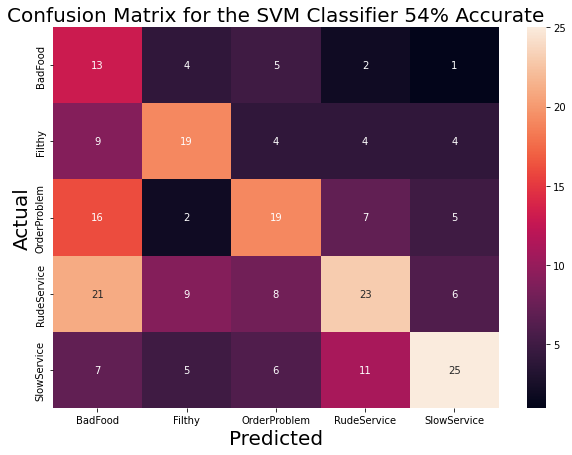

In [107]:

array = cm

final_labels = ['BadFood', 'Filthy', 'OrderProblem', 'RudeService', 'SlowService']
df_cm = pd.DataFrame(array, index = [i for i in final_labels],
                  columns = [i for i in final_labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel("Predicted", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix for the SVM Classifier 54% Accurate", fontsize = 20)
plt.show()
plt.close()

## 10-fold cross validation: 
We do not use it as it gives the average of accuracies but we instead use the mod of accuracies

In [108]:
n_manual = len(data)

def list_model_accur(epoch, model):
    if model == "naive":
        classifier = nltk.NaiveBayesClassifier
    if model == "svm":
        classifier = SklearnClassifier(NuSVC())#LinearSVC
    ls = []
    for i in range(epoch):
        random.shuffle(data)
        train_manual_data = data[:int(round(.8*n_manual))]
        test_manual_data = data[int(round(.8*n_manual)):]
        our_model = classifier.train(train_manual_data)
        ls.append( nltk.classify.accuracy(our_model, test_manual_data) )
    return ls


In [109]:
niave_bayes_acc = list_model_accur(10, "naive")

In [110]:
print("The Naive Bayes gives these accuracies: \n", niave_bayes_acc)

The Naive Bayes gives these accuracies: 
 [0.49361702127659574, 0.43829787234042555, 0.4851063829787234, 0.4723404255319149, 0.425531914893617, 0.4425531914893617, 0.4553191489361702, 0.48936170212765956, 0.5234042553191489, 0.5361702127659574]


In [111]:
np.median(niave_bayes_acc)

0.4787234042553191

In [112]:
svm_acc = list_model_accur(10, "svm")
print("The SVM gives these accuracies: \n", svm_acc)

The SVM gives these accuracies: 
 [0.4978723404255319, 0.5574468085106383, 0.5148936170212766, 0.5063829787234042, 0.5106382978723404, 0.5191489361702127, 0.5063829787234042, 0.5106382978723404, 0.5276595744680851, 0.5191489361702127]


In [115]:
np.median(svm_acc)

0.5127659574468084

## How Does TextBlob NaiveBayes Classifier Perform?

In [116]:
n = len(paired)
train = paired[:int(round(.8*n))]
test = paired[int(round(.8*n)):]

In [117]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

## Accuracy of TextBlob Classifier (For Baseline Purposes)

In [118]:
cl.accuracy(test)

0.35319148936170214